In [1293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1294]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams.update({'font.size': 22})

In [1295]:
# Numeric field
SALARY_FIELD = 'Salary'

# Response field
QUESTION_FIELD = 'IDE'

# Filter out numeric fields less than this amount.
MIN_SALARY = 10000

# Minimum response count per group for the response to be considered in results.
MIN_RESPONSE_COUNT = 50

# Function that aggregates grouped responses (usually mean or median).
AGG_FN = 'median'

In [1296]:
# Build a dictionary from column name to full question text.
qdf = pd.read_csv('./developer_survey_2017/survey_results_schema.csv').to_dict('s')
qs = dict(zip(qdf['Column'], qdf['Question']))

In [1297]:
# Load actual survey results
df = pd.read_csv('./developer_survey_2017/survey_results_public.csv')

In [1298]:
# Filter out nulls and responses that are not in the U.S. or do not use USD
# (we can't compare different currencies)
df.dropna(subset=[SALARY_FIELD, QUESTION_FIELD], how='any', inplace=True)
df = df[df['Currency'] == 'U.S. dollars ($)']
df = df[df['Country'] == 'United States']

In [1299]:
smalldf = df[[SALARY_FIELD, QUESTION_FIELD]]

In [1300]:
# Split up joined multiple-choice responses.
split = pd.DataFrame(smalldf[QUESTION_FIELD].astype(str).str.split(';').tolist(), index=smalldf[SALARY_FIELD])
split = split.reset_index()[[0, SALARY_FIELD]]
split.columns = [QUESTION_FIELD, SALARY_FIELD]
smalldf = split

In [1301]:
# Filter out salaries below the minimum (some people respond with impossibly low salaries).
smalldf = smalldf[smalldf[SALARY_FIELD] >= MIN_SALARY]

In [1302]:
# Group by survey response.
groupby = smalldf.groupby(QUESTION_FIELD)

agg = groupby.agg(['count', AGG_FN]).reset_index()
sal = agg[SALARY_FIELD]
agg[SALARY_FIELD] = sal[sal['count'] > MIN_RESPONSE_COUNT]
result = agg.dropna().sort_values([(SALARY_FIELD, AGG_FN)], ascending=False)
result

IDE Salary          
                    count    median
4            Emacs  213.0  110000.0
16             Vim  466.0  106268.0
6         IntelliJ   85.0  106000.0
3          Eclipse   78.0   99500.0
17   Visual Studio  321.0   95000.0
0   Android Studio   68.0   94000.0
14    Sublime Text  669.0   92500.0
1             Atom  639.0   88000.0
9        Notepad++  820.0   88000.0

In [1303]:
num_respondents = result[(SALARY_FIELD, 'count')].sum()

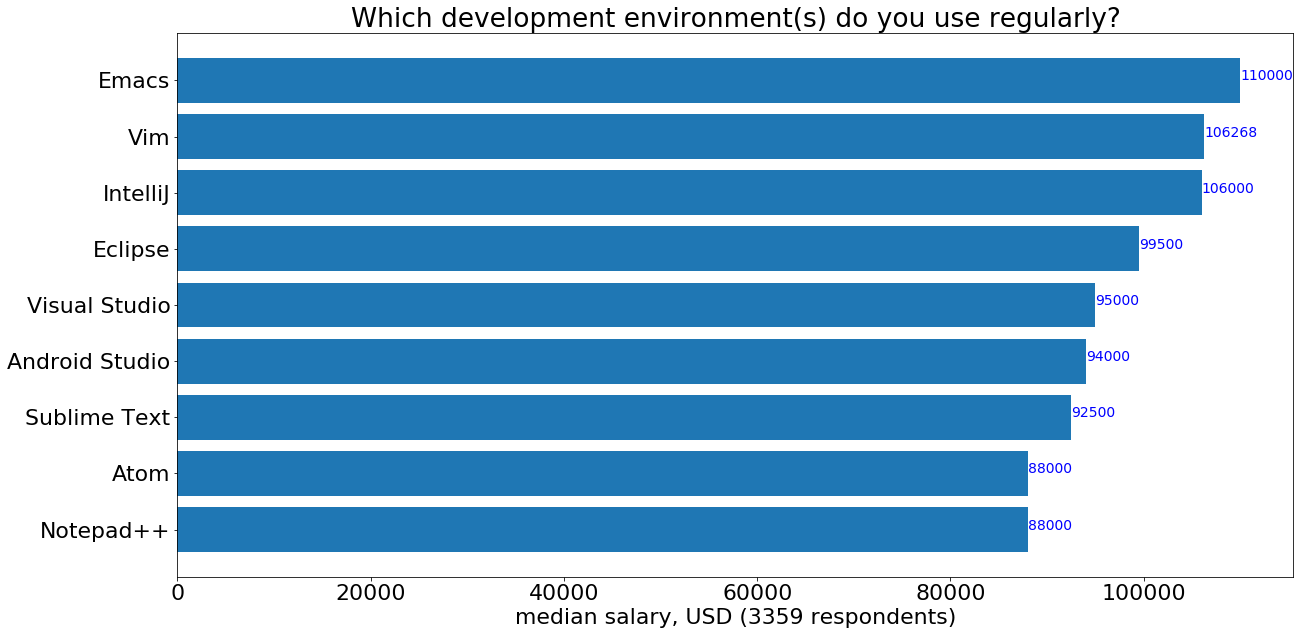

In [1304]:
xs = result[QUESTION_FIELD]
xpos = np.arange(len(xs))[::-1]
ys = result[(SALARY_FIELD, AGG_FN)]
fig, ax = plt.subplots()    
plt.barh(xpos, ys)
plt.yticks(xpos, xs)
plt.xlabel('%s %s, USD (%d respondents)' % (AGG_FN, SALARY_FIELD.lower(), num_respondents))
plt.title(qs[QUESTION_FIELD])
for i, v in enumerate(ys):
    plt.text(v, len(ys) - 1 - i, '%d' % (int(v)), color='blue', fontweight='normal', fontsize=14)
plt.show()

In [1307]:
groupby.min()

,Salary
IDE,
Android Studio,34000.0
Atom,10000.0
Coda,35360.0
Eclipse,40000.0
Emacs,10000.0
IPython / Jupyter,53000.0
IntelliJ,12000.0
Komodo,90000.0
NetBeans,48000.0


In [1308]:
groupby.max()

,Salary
IDE,
Android Studio,175000.0
Atom,195000.0
Coda,167000.0
Eclipse,187000.0
Emacs,195000.0
IPython / Jupyter,150000.0
IntelliJ,195000.0
Komodo,140000.0
NetBeans,184000.0
